# Motor Escalar Autograd

Este proyecto es un motor autograd que usa únicamente valores escalares. Es capaz de guardar datos de variables en operaciones matemáticas y después calcular su comportamiento teniendo en cuenta sus hijos. Este tipo de técnica se usa para el entrenamiento de redes neuronales, con la finalidad de maximizar la eficiencia de las mismas.

El proyecto se separa en dos ficheros **_'engine.py'_**, que contiene todo lo necesario para crear y modificar valores, y **_'neural_network.py'_**, que contiene todo el código referente a la red neuronal.

## Engine.py

El fichero **_'engine.py'_** contiene el código necesario para el tratamiento de datos, como por ejemplo la creacion de objetos _Value_ y sus operaciones matemáticas como la _suma, resta, multiplicación, división, potencia, negación_ y otras funciones para conseguir la _uncidad lineal rectificada (ReLU)_ o para la _retropropagación_.

- Definición de la clase **_Value_** y sus parametros:

La clase **_Value_** es un objecto con el principal cometido de guardar la información que se va a usar posteriormente para realizar los calculos en la red neuronal. Este objeto esta definido con un constructor que le pasa un parámetro _data_ (valor numerico del objeto), un parámetro *_children* (una tupla que guarda todos los hijos del objeto), un parámetro *_op* (un valor escrito que guarda el tipo de operador usado para el cálculo del objeto actual) y un parámetro _label_ (un valor escrito que se usa como etiqueta en la visualización de datos).

A parte de los parámetros de construcción del objeto, dentro del mismo constructor se pueden observar el parámetro _grad_ que se usa para guardar el gradiente del objeto en comparación con el resultado final calculando la derivada del resultado final respecto al objeto actual ($\frac{dx}{dy}$ donde "$dx$" es la derivada del resultado final y "$dy$" es la derivada del objeto actual), el parámetro *_backward* que se usa para la retropropagación dentro de la red neuronal y el parámetro *_prev* que se usa para obtener los hijos del objeto actual.

A continuación se encuentra la defincición de la clase **_Value_** y un ejemplo de su construcción:

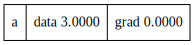

In [13]:
import visualization as vs

class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print fucntion
        return f"Value(data={self.data}, grad={self.grad})"

'''Example'''
a = Value(3, label='a')

vs.draw_dot(a)

- Operador de **_suma_** - $x+y$:

El operador de **_suma_** se usa para hacer una adición de dos objetos **_Value_**. Para esto mismo se usa el símbolo **_"\+"_** en una ecuación que tiene una forma similar a la siguiente: $x + y$.

A continuación se encuentra la definicion del método ***\_\_add\_\_*** y un ejemplo de su uso:

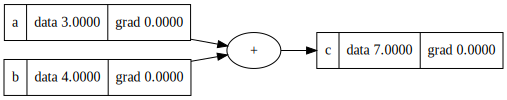

In [14]:
def __add__(self, other): # self + other
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
        self.grad += out.grad
        other.grad += out.grad
    out._backward = _backward
    return out

def __radd__(self, other): # other + self
    return self + other

Value.__add__ = __add__
Value.__radd__ = __radd__

'''Example'''
a = Value(3, label='a')
b = Value(4, label='b')
c = a + b; c.label = 'c'

vs.draw_dot(c)

- Operador **_multiplicación_** - $x·y$:

El operador de **_multiplicación_** se usa para hacer un producto de dos objetos **_Value_**. Para esto mismo se usa el símbolo **_"\*"_** en una ecuación que tiene una forma similar a la siguiente: $x · y$, o en código $x*y$.

A continuación se encuentra la definicion del método ***\_\_mul\_\_*** y un ejemplo de su uso:

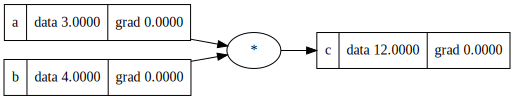

In [15]:
def __mul__(self, other): # self * other
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
        self.grad += other.data * out.grad
        other.grad += self.data * out.grad
    out._backward = _backward
    return out

def __rmul__(self, other): # other * self
    return self * other

Value.__mul__ = __mul__
Value.__rmul__ = __rmul__

'''Example'''
a = Value(3, label='a')
b = Value(4, label='b') 
c = a * b; c.label = 'c'

vs.draw_dot(c)

- Operador de **_potencia_** - $x^y$:

El operador de **_potencia_** se usa para hacer una potencia de dos objetos **_Value_**. Para esto mismo se usa el símbolo **_"\*\*"_** en una ecuación que tiene una forma similar a la siguiente: $x ^ y$, o en código: $x ** y$.

A continuación se encuentra la definicion del método ***\_\_pow\_\_*** y un ejemplo de su uso:

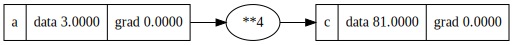

In [16]:
def __pow__(self, other): # self ** other
    assert isinstance(other, (int, float)), "only supporting int/float powers"
    out = Value(self.data**other, (self,), f'**{other}')
    def _backward():
        self.grad += (other * self.data**(other-1)) * out.grad
    out._backward = _backward
    return out

Value.__pow__ = __pow__

'''Example'''
a = Value(3, label='a')
b = 4
c = a ** b; c.label = 'c'

vs.draw_dot(c)

- Unidad lineal rectificada _(ReLU)_ - $f(x) = max(0,x)$:

La función de activación de **_unidad lineal rectificada_** o **_ReLU_** se usa para conseguir un valor positivo de salida en los objetos **_Value_**. Para esto mismo se usa el método **_.relu()_**. La ecuación tiene una forma similar a la siguiente: $f(x) = max(0,x)$, por lo que los valores de salida negativos serán devueltos como **_0_** y los valores de salida positivos serán devueltos como su **_valor original_**.

Función ReLU $f(x) = max(0,x)$ en una gráfica teniendo como entrada la función $x=y$:

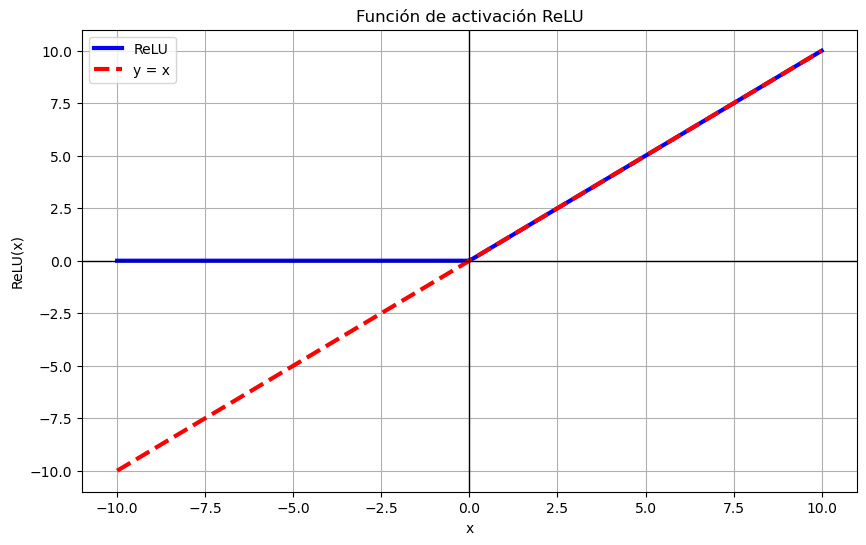

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 200)
y = relu(x)

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(x, y, 'b', label='ReLU', linewidth=3)
plt.plot(x, x, 'r--', label='y = x', linewidth=3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.axvline(x=0, color='k', linestyle='-', linewidth=1)
plt.title('Función de activación ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.legend()


plt.show()

A continuación se encuentra la definicion del método **_relu_** y dos ejemplos de su uso, uno con cada tipo de salida de dato:

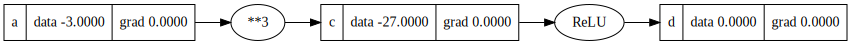

In [18]:
def relu(self): # ReLU function
    out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')
    def _backward():
        self.grad += (out.data > 0) * out.grad
    out._backward = _backward
    return out

Value.relu = relu

'''Example'''
#if the output is negative, returns 0
a = Value(-3, label='a')
b = 3
c = a ** b; c.label = 'c'
d = c.relu(); d.label = 'd' # returns 0

vs.draw_dot(d)

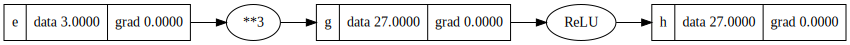

In [19]:
#if the output is positive, returns the output
e = Value(3, label='e')
f = 3
g = e ** f; g.label = 'g'
h = g.relu(); h.label = 'h' # returns 81

vs.draw_dot(h)

- Retropropagación:

La **_retropropagación_** se usa para calcular el gradiente de la funcion de pérdida (comparación entre la salida obtenida y la salida deseada, como por ejemplo: $f(y, y') = (y - y')^2$ donde "$y$" es la salida obtenida e "$y'$" es la salida deseada) con respecto a los parámetros anteriores. Esto permite observar como se comporta una operación en concreto y permite realizar los cambios necesarios para minimizar pérdidas y conseguir un mejor resultado. Para esto se usa el método **_.backward()_**.

Al llamar a este método se calcula de forma regresiva (de final a principio) los gradientes de cada objeto comparando la derivada del resultado final en cuanto a la derivada del objeto actual ($\frac{dx}{dy}$).

Por ejemplo: teniendo en cuenta que tenemos un objeto "a" y un objeto "b" que resultan en un objeto "e" ($a·b=e$), el resultado "e" se suma con un objeto "c" que resulta en "d" ($e+c=d$) y el resultado "d" se multiplica por un objeto "g" que da el resultado final "L" ($d·g=L$), haciendo la **_retropropagacion_** estariamos calculando los gradientes en el siguiente orden y de la siguiente manera teniendo en cuenta que una derivada se expresaría de la siguiente manera $(f(x+h)-f(x))/h$ donde $x$ es el valor sobre el que se aplica la derivada y $h$ es un valor cambiante:

1. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "L": $\frac{dL}{dL} = 1$
2. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "d": $\frac{dL}{dd} = ((d+h)·g - g·(d))/h = (d·g + h·g - g·d)/h = h·g/h = g = -2$
3. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "g": $\frac{dL}{dg} = ((g+h)·d - d·(g))/h = (g·d + h*d - d·g)/h = h·d/h = d = 4$
4. Empezar a calcular las derivadas intermedias:
    1. Calcular el gradiente de la derivada de "d" en cuanto a la derivada de "e": $\frac{dd}{de} = ((e+h+c) - (c+e))/h = (h)/h = 1$
    2. Calcular el gradiente de la derivada de "d" en cuanto a la derivada de "c": $\frac{dd}{dc} = ((c+h+e) - (e+c))/h = (h)/h = 1$
    3. Calcular el gradiente de la derivada de "e" en cuanto a la derivada de "a": $\frac{de}{da} = ((a+h)·b - b·(a))/h = (a·b + h·b - b·a)/h = h·b/h = b = -3$
    4. Calcular el gradiente de la derivada de "e" en cuanto a la derivada de "b": $\frac{de}{db} = ((b+h)·a - a·(b))/h = (b·a + h·a - a·b)/h = h·a/h = a = 2$

Para calcular los gradientes de los objetos que no están directamente conectados se usa la **_regla de la cadena_** donde $\frac{dy}{dx}=\frac{dy}{du}·\frac{du}{dx}$.

5. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "e" usando la regla de la cadena: $\frac{dL}{de} = \frac{dL}{dd}·\frac{dd}{de} = -2 · 1 = -2$
6. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "c" usando la regla de la cadena: $\frac{dL}{dc} = \frac{dL}{dd}·\frac{dd}{dc} = -2 · 1 = -2$
7. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "a" usando la regla de la cadena: $\frac{dL}{da} = \frac{dL}{de}·\frac{de}{da} = -2 · (-3) = 6$
8. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "b" usando la regla de la cadena: $\frac{dL}{db} = \frac{dL}{de}·\frac{de}{db} = -2 · 2 = -4$

A continuación se encuentra la definición del método **_backward_** y un ejemplo de su uso:

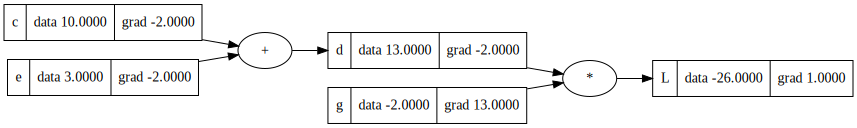

In [20]:
def backward(self): # backpropagation
    topo = []
    visited = set()
    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(self)
    self.grad = 1
    for v in reversed(topo):
        v._backward()

Value.backward = backward

'''Example'''
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = e + c; d.label = 'd'
e = a*b; e.label = 'e'
g = Value(-2.0, label='g')
L = d * g; L.label = 'L'
L.backward()

vs.draw_dot(L)

- Operador de **_negación_** - ($-x$):

El operador de **_negación_** se usa para negar el valor de los datos de un objeto **_Value_**. Para esto se usa el símbolo **_"-"_** delante de la variable. La ecuación que se usa para esto es la siguiente: $x = x · (-1)$ o en su modo simplificado $x = -x$.

A continuación se encuentra la definición del método ***\_\_neg\_\_*** y un ejemplo de su uso:

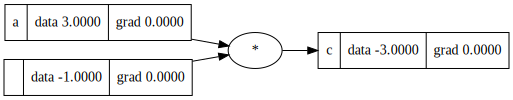

In [21]:
def __neg__(self): # -self
    return self * -1

Value.__neg__ = __neg__

'''Example'''
a = Value(3, label='a')
c = -a; c.label = 'c'

vs.draw_dot(c)

- Operador de **_resta_** - ($x-y$):

El operador de **_resta_** se usa para substraer el valor de dos objetos **_Value_**. Para esto se usa el símbolo **_"-"_** entre dos objetos. La ecuación que se usa para esto es la siguiente: $x - y$, que se puede expandir de la siguiente manera si se cambia la expresión de negación: $x + [y · (-1)]$.

A continuación se encuentra la definición del método ***\_\_sub\_\_*** y un ejemplo de su uso:

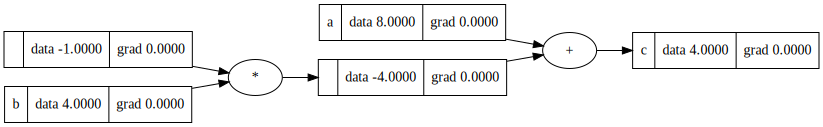

In [22]:
def __sub__(self, other): # self - other
    return self + (-other)

def __rsub__(self, other): # other - self
    return other + (-self)

Value.__sub__ = __sub__
Value.__rsub__ = __rsub__

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a - b; c.label = 'c'

vs.draw_dot(c)

- Operador de **_división_** ($x/y$):

El operador de **_división_** se usa para dividir el valor de dos objetos **_Value_**. Para esto se usa el símbolo **_"/"_** entre dos objetos. La ecuación que se usa para esto es la siguiente: $x / y$, que se puede expandir de la siguiente manera: $x · [y^{-1}]$.

A continuación se encuentra la definición del método ***\_\_truediv\_\_*** y un ejemplo de su uso:

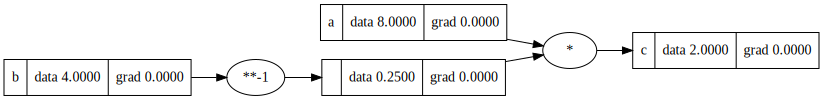

In [23]:
def __truediv__(self, other): # self / other
    return self * other**-1

def __rtruediv__(self, other):
    return other * self**-1

Value.__truediv__ = __truediv__
Value.__rtruediv__ = __rtruediv__

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a / b; c.label = 'c'

vs.draw_dot(c)

Aparte de todos los anteriores, la clase _Value_ tiene propiedades para guardar los hijos y los operadores que se han usado para conseguir el objeto actual:

- Propiedad para acceder a los hijos del nodo actual *(._prev)*:

Esta propiedad devuelve los hijos del objeto actual, por ejemplo: si definimos un objeto "a" con el valor _1_ y un objeto "b" con el valor _2_ al hacer la suma de los dos objetos conseguiríamos un objeto "c" con el valor _3_, si usamos la propiedad **_\.\_prev_** con el objeto "c" nos devolvería los objetos "a" y "b" puesto que son los objetos utilizados para crear el objeto "c", es decir, sus hijos.

A continuación se encuentra un ejemplo del uso de la propiedad:

In [24]:
'''Example'''
a = Value(3, label='a')
b = Value(7, label='b')
c = a + b; c.label = 'c'

c._prev # returns the children of c, in this case a and b

{Value(data=3, grad=0), Value(data=7, grad=0)}

- Propiedad para acceder al tipo de operador que ha creado el nodo actual *(._op)*:

Esta propiedad devuelve el operador que se ha usado para conseguir el objeto actual. Por ejemplo: si hacemos la suma de dos objetos y usamos la propiedad **_\.\_op_** sobre el resultante obtendremos el símbolo _"+"_ puesto a que la operación realizada ha sido una suma.

A continuación se encuentra un ejemplo del uso de la propiedad:

In [25]:
'''Example'''
a = Value(5, label='a')
b = Value(2, label='b')
c = a / b; c.label = 'c'

c._op # returns the operator that was used to create the value, in this case multiplication '*'

'*'

## Neural_network.py

El fichero ***neural_network.py*** contiene el código que define y hace funcionar la red neuronal. Se definen conceptos como las neuronas (*Neuron*), las capas (*Layer*) y los perceptrones multicapa (*MLP*).

- Definición de la clase ***Neuron***, sus parámetros y sus métodos:

Una ***neurona*** se puede definir como una unidad básica que recibe señales (información) de otras neuronas, las procesa y las envía a otras neuronas conectadas.

A continuación se puede ver la definición de la clase ***Neuron*** y su constructor junto a un ejemplo de su uso:

El **constructor** de la clase ***Neuron*** recoge los parámetros *"nin"* (número de entradas que hay a la neurona) y *"nonlin"* (). Dentro del constructor se puede encontrar la propiedad *"w"* que define el peso de cada uno de las entradas con un número entre *-1* y *1* ($-1.0 \le N \le 1.0$) y la propiedad *"b"* que define la preferencia *(bias)* de la neurona en cuanto a los datos que va a pasar a las siguientes neuronas.

In [26]:
import random

class Neuron():

    def __init__(self, nin, nonlin=True):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(0)
        self.nonlin = nonlin

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"
    
'''Example'''
n = Neuron(3)
n

ReLUNeuron(3)

Método ***__call__***:

El método ***\_\_call\_\_*** se usa para dar información a una neurona. Por ejemplo: si tenemos una lista de datos con *2* elementos $(x = [y, z])$ y queremos pasarle esos datos a una neurona crearíamos una neurona de *2* dimensiones $(n = Neuron(2))$ y le pasariamos los datos haciendo $(n(x))$ lo que internamente llamaría al metodo ***\_\_call\_\_*** de la neurona $n$ y haría la suma de los valores utilizando el producto escalar $(a·b = a_1·b_1+a_2·b_2+...+a_n·b_n)$. Esto devuelve un objeto **_Value_** con un valor entre *0* y *n* que define el factor de activación de la neurona tras utilizar la formula ReLU ($f(x) = max(0,n)$).

A continuación se puede ver la definición del método ***call*** y un ejemplo de su uso:

In [27]:
def __call__(self, x):
    act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
    return act.relu() if self.nonlin else act

Neuron.__call__ = __call__

'''Example'''
x = [3.0, 2.0]
n = Neuron(2)
n(x)

Value(data=0, grad=0)

Método ***parameters***:

El método ***parameters*** del objeto ***Neuron*** sirve para modificar el peso que tiene cada una de las entradas a la neurona para minimizar la pérdida de la red neuronal y así conseguir el resultado que se quiere. Este método devuelve dos listas concatenadas de los pesos *"w"* y las preferéncias *"b"* de la neurona.

A continuación se puede ver la definición del método ***parameters*** y un ejemplo de su uso:

In [28]:
def parameters(self):
    return self.w + [self.b]

Neuron.parameters = parameters

'''Example'''
n = Neuron(3)
n.parameters()

[Value(data=-0.2796486336969122, grad=0),
 Value(data=0.9750996346703305, grad=0),
 Value(data=0.4770862950386956, grad=0),
 Value(data=0, grad=0)]

- Definición de la clase ***Layer***, sus parámetros y sus métodos:

Una ***capa*** es un conjunto de neuronas. Normalmente en las redes neuronales se clasifican las capas por el funcionamiento que desempeñan a un nivel global, estas son las más básicas:

1. Capa de entrada *(Input Layer)*: capa o conjunto de neuronas que contiene la primera información introducida a la red y la codifica para su posterior procesamiento en las siguientes capas.
2. Capa oculta *(Hidden Layer)*: capa o conjunto de neuronas intermédia que recibe datos de otra capa oculta o la capa de entrada y los procesa para pasarlos a la siguiente capa.
3. Capa de salida *(Output Layer)*: última capa o conjunto de neuronas que recibe los datos de una capa anterior y produce los resultados finales.

A continuación se puede ver la definición de la clase ***Layer*** y su constructor junto a un ejemplo de su uso:

En el **constructor** de la clase ***Layer*** se recogen los parámetros *"nin"* (número de entradas), *"nout"* (número de neuronas que hay en la capa) y _"**kwargs"_ (). Dentro del constructor se puede observar la propiedad *"neurons"* que define una lista de neuronas pertenecientes a la capa.

In [29]:
class Layer():

    def __init__(self, nin, nout, **kwargs):
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]
    
    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"
    
'''Example'''
l = Layer(2, 3)
l

Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)]

Método ***call***:

Al llamar el método ***\_\_call\_\_*** en una capa de neuronas se llama al metodo ***\_\_call\_\_*** de cada neurona dentro de esa capa.

A continuación se puede observar la definición del metodo ***\_\_call\_\_*** y un ejemplo de su uso:

In [30]:
def __call__(self, x):
    out = [n(x) for n in self.neurons]
    return out[0] if len(out) == 1 else out

Layer.__call__ = __call__

'''Example'''
x = [3.0, 2.0]
l = Layer(2, 3)
l(x)

[Value(data=0, grad=0), Value(data=0, grad=0), Value(data=0, grad=0)]

Método ***parameters***:

El método ***parameters*** del objeto ***Layer*** recoge todos los pesos *"w"* y todos las preferéncias *"b"* de cada neurona en la capa.

A continuación se puede ver la definición del método ***parameters*** y un ejemplo de su uso:

In [31]:
def parameters(self):
    return [p for n in self.neurons for p in n.parameters()]

Layer.parameters = parameters

'''Example'''
l = Layer(2, 3)
l.parameters()

[Value(data=-0.4213596669601414, grad=0),
 Value(data=0.17611587138484452, grad=0),
 Value(data=0, grad=0),
 Value(data=0.845052448466243, grad=0),
 Value(data=-0.9480970139539309, grad=0),
 Value(data=0, grad=0),
 Value(data=0.4312082054683728, grad=0),
 Value(data=-0.3224613500940674, grad=0),
 Value(data=0, grad=0)]

- Definición de la clase ***MLP***, sus parámetros y sus métodos:

Un ***perceptrón multicapa*** (multilayer perceptron) o ***MLP*** es un modelo de red neuronal *sin retroalimentación* (la información se pasa en una sola dirección) que se forma sobre neuronas totalmente conectadas organizadas en capas que usan funciones de activación no lineales como la función sigmoide ($\sigma(x)=\frac{1}{1+e^{-x}}$), la función de tangente hiperbólica ($tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$) o la unidad lineal rectificada ($ReLU(x)=max(0,x)$).

A continuación se puede ver la definición de la clase ***MLP*** y su constructor junto a un ejemplo de su uso:

El constructor de la clase ***MLP*** recibe los parámetros *nin* (número de entradas) y *nouts* (lista de neuronas que hay en cada capa que forma la red), por ejemplo: una red *"m"* con *3* neuronas en la capa de entrada, *2* capas ocultas con *4* neuronas en cada una y *1* capa de salida se definiría de la siguiente manera $m = MLP(3, [4, 4, 1])$. Dentro del constructor se puede encontrar la variable *"sz"* que sirve para guardar todas las neuronas y la propiedad *"layers"* que crea cada capa con sus neuronas para hacer los cálculos posteriormente.

In [32]:
class MLP():

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], nonlin=i!=len(nouts)-1) for i in range(len(nouts))]
    
    def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"
    
'''Example'''
x = [3.0, 2.0, -1.0]
m = MLP(3, [4, 4, 1])
m

MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]

Método ***call***:

Al llamar el método ***\_\_call\_\_*** en un objeto *MLP* se llama el método ***\_\_call\_\_*** de cada objeto *Layer* dentro de la red y se llama el método ***\_\_call\_\_*** de cada objeto *Neuron* dentro de cada capa.

A continuación se puede ver la definición del método ***\_\_call\_\_*** y un ejemplo de su uso:

In [33]:
def __call__(self, x):
    for layer in self.layers:
        x = layer(x)
    return x

MLP.__call__ = __call__

'''Example'''
x = [3.0, 2.0, -1.0]
m = MLP(3, [4, 4, 1])
m(x)

Value(data=0.0, grad=0)

Método ***parameters***:

El método ***parameters*** de la clase ***MLP*** recoge todos los pesos *"w"* y todas las preferéncias *"b"* de cada neurona de cada capa en la red neuronal.

A continuación se puede ver la definición del método ***parameters*** y un ejemplo de su uso:

In [34]:
def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

MLP.parameters = parameters

'''Example'''
m = MLP(3, [4, 4, 1])
m.parameters()

[Value(data=-0.6637869770478648, grad=0),
 Value(data=-0.45797565525906414, grad=0),
 Value(data=0.9142863500448135, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.19888223408018502, grad=0),
 Value(data=0.20523878670691076, grad=0),
 Value(data=0.12777386923798173, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.4815063009863376, grad=0),
 Value(data=0.7519489735512732, grad=0),
 Value(data=0.5998075581901365, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.6239126868112446, grad=0),
 Value(data=0.9707877378792533, grad=0),
 Value(data=-0.5241971378263905, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.9457289859782168, grad=0),
 Value(data=0.10683865633851686, grad=0),
 Value(data=0.2707294970669203, grad=0),
 Value(data=-0.7398872664095153, grad=0),
 Value(data=0, grad=0),
 Value(data=0.6923844056179418, grad=0),
 Value(data=-0.12311749951264983, grad=0),
 Value(data=0.5042099517433503, grad=0),
 Value(data=-0.7748939969882465, grad=0),
 Value(data=0, grad=0),
 Value(data=0.185337

# Ejemplo final

Un ejemplo visual de una red neuronal MLP con las siguientes características:

Los datos de entrada son los siguientes:
- Entrada número *1* con los valores: $2.0$, $3.0$ y $-1.0$.
- Entrada número *2* con los valores: $3.0$, $-1.0$ y $0.5$.
- Entrada número *3* con los valores: $0.5$, $1.0$ y $1.0$.
- Entrada número *4* con los valores: $1.0$, $1.0$ y $-1.0$.

Los resultados que queremos son los siguientes:
- Para la entrada *1*: $1.0$
- Para la entrada *2*: $-1.0$
- Para la entrada *3*: $-1.0$
- Para la entrada *4*: $1.0$

Función de pérdida (cómo de lejos estamos del resultado objetivo) usando el *error cuadrático medio* (MSE): $MSE = (x - y)^2$ donde $x$ es el resultado obtenido e $y$ es el resultado objetivo.

Creación de la red neuronal:

In [35]:
#network creation
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.11100127895112721, grad=0)

Definición de los datos:

In [36]:
#data
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
#desired targets
ys = [1.0, -1.0, -1.0, 1.0]

Iteración de los datos en la red reduciendo la pérdida:

In [37]:
#iteration
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.05 * p.grad
  
  print(f"Iteration {k}, Loss: {loss.data})")

Iteration 0, Loss: 4.173676022339345)
Iteration 1, Loss: 5.250277407423709)
Iteration 2, Loss: 4.309386932266958)
Iteration 3, Loss: 3.4635159982086856)
Iteration 4, Loss: 2.8949935692827173)
Iteration 5, Loss: 2.41409551854505)
Iteration 6, Loss: 1.977172646177725)
Iteration 7, Loss: 1.5833919466562092)
Iteration 8, Loss: 1.2414048884351223)
Iteration 9, Loss: 0.9562685569004297)
Iteration 10, Loss: 0.7264645053902632)
Iteration 11, Loss: 0.5458989060177878)
Iteration 12, Loss: 0.40666799269185)
Iteration 13, Loss: 0.300841399183293)
Iteration 14, Loss: 0.22130290272453118)
Iteration 15, Loss: 0.16205052645877055)
Iteration 16, Loss: 0.11822110527221774)
Iteration 17, Loss: 0.08598328323323635)
Iteration 18, Loss: 0.062379613194226975)
Iteration 19, Loss: 0.04516175205573528)


Datos obtenidos:

In [38]:
ypred

[Value(data=0.8543718862273797, grad=-0.2912562275452406),
 Value(data=-0.9629415528266982, grad=0.07411689434660351),
 Value(data=-0.9629415528266982, grad=0.07411689434660351),
 Value(data=0.8543718862273797, grad=-0.2912562275452406)]

Ejemplo visualizado de la primera entrada de los datos que ha usado la red neuronal:

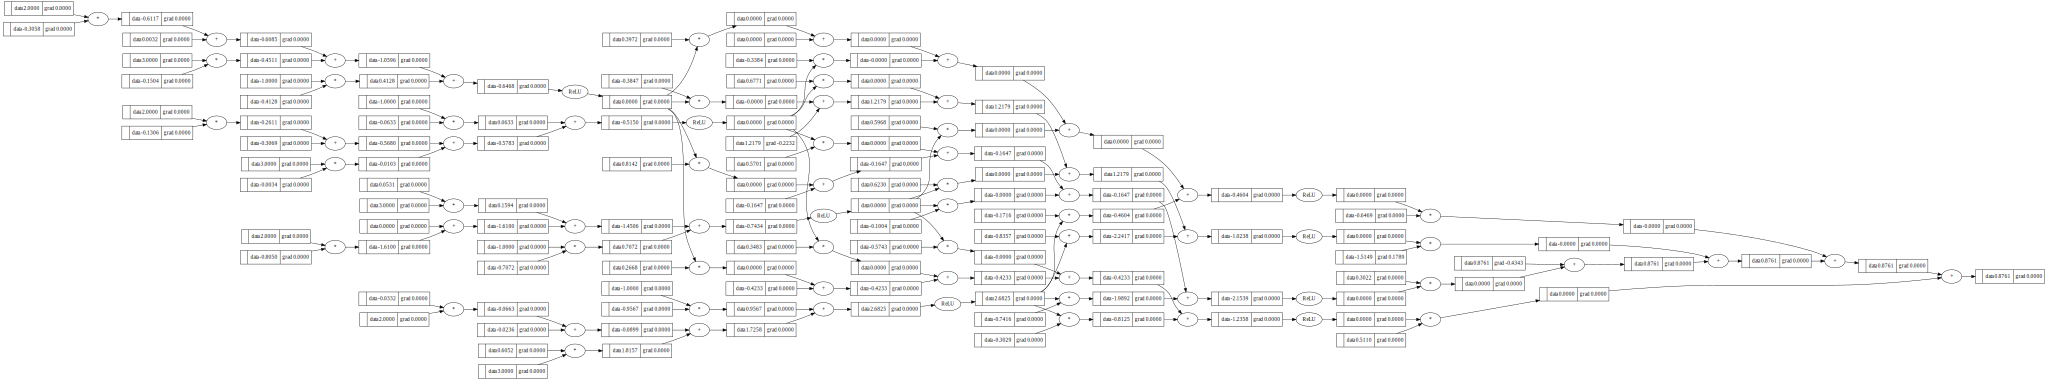

In [39]:
import visualization as vs
vs.draw_dot(n(xs[0]))